# Task 2: Learning & Dynamics
Matrix games

Biased Rock-Paper-Scissors Game, Dispersion Game, Battle of the Sexes and Prisoners Dilemma

Games definitions:

In [7]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pyspiel
from open_spiel.python import rl_environment
from open_spiel.python.algorithms import tabular_qlearner, boltzmann_tabular_qlearner

In [8]:
# Definition of Games

matching_pennies_payoffs_1 = np.array( [[-1,1],
                                        [1,-1]])

matching_pennies_payoffs_2 = np.array( [[1,-1],
                                        [-1,1]])

matching_pennies_new = pyspiel.create_matrix_game("matching_pennies_new",
                                              "Matching Pennies Two",
                                              ["H", "T"], ["H", "T"],
                                              matching_pennies_payoffs_1,
                                              matching_pennies_payoffs_2)

# ROCK PAPER SCISSORS
rock_paper_scissors_payoffs = np.array([[0,-0.25,0.5],
                                        [0.25,0,-0.05],
                                        [-0.5,0.05,0]])

rock_paper_scissors = pyspiel.create_matrix_game("rock_paper_scissors",
                           "Biased Rock-Paper-Scissors",
                           ["R", "P", "S"], ["R", "P", "S"],
                           rock_paper_scissors_payoffs,
                           rock_paper_scissors_payoffs.T)

# DISPERSION GAME
dispersion_game_payoffs = np.array([[-1,1],
                                    [1,-1]])

dispersion_game = pyspiel.create_matrix_game("dispersion_game",
                           "Dispersion Game",
                           ["A", "B"], ["A", "B"],
                           dispersion_game_payoffs,
                           dispersion_game_payoffs)

# BATTLE OF SEXES
battle_of_the_sexes_payoffs_1 = np.array([[3,0],
                                          [0,2]])
battle_of_the_sexes_payoffs_2 = np.array([[2,0],
                                          [0,3]])

battle_of_the_sexes = pyspiel.create_matrix_game("battle_of_the_sexes",
                           "Battle Of The Sexes",
                           ["O", "M"], ["O", "M"],
                           battle_of_the_sexes_payoffs_1,
                           battle_of_the_sexes_payoffs_2)

# PRISONERS DILEMMA
prisoners_dilemma_payoffs_1 = np.array([[-1,-4],
                                        [0,-3]])
prisoners_dilemma_payoffs_2 = np.array([[-1,0],
                                        [-4,-3]])

prisoners_dilemma = pyspiel.create_matrix_game("prisoners_dilemma",
                           "Prisoners Dilemma",
                           ["C", "D"], ["C", "D"],
                           prisoners_dilemma_payoffs_1,
                           prisoners_dilemma_payoffs_2)

Setting up rl environment and agents:

In [9]:
def train(env, agents, training_episodes=100):
    rewards = []

    for cur_episode in range(training_episodes):
        time_step = env.reset()
        while not time_step.last():
            actions = [
                    agent.step(time_step).action
                    for agent in agents
                ]
            time_step = env.step(actions)
        # Episode is over, step all agents with final info state.
        for agent in agents:
            agent.step(time_step)
        rewards.append(time_step.rewards)

    print("training completed after", training_episodes, "episodes")
    return rewards

In [10]:
num_players = 2
env = rl_environment.Environment(rock_paper_scissors)
num_actions = env.action_spec()["num_actions"]
agents = [
  tabular_qlearner.QLearner(player_id=idx, num_actions=num_actions)
  for idx in range(num_players)
]

Training agents:

In [11]:
training_episodes = 100
rewards = train(env, agents, training_episodes)

training completed after 100 episodes


In [12]:
def plot_learning_trajectory(rewards, training_episodes=100):
    plt.plot(range(training_episodes), rewards, )
    plt.xlabel('Episodes')
    plt.ylabel('Reward')
    plt.title('Learning Trajectory')
    plt.legend(["Player 1","Player 2"])
    plt.show()
%matplotlib inline

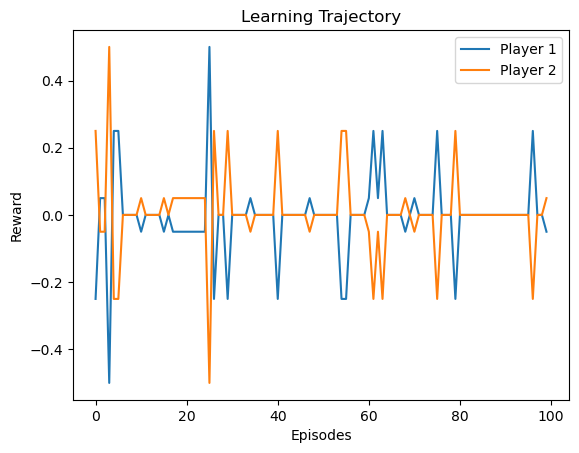

In [13]:
plot_learning_trajectory(rewards, training_episodes)

### Lenient Boltzmann Q-learning

In [14]:
env = rl_environment.Environment(rock_paper_scissors)
num_actions = env.action_spec()["num_actions"]
agents = [
  boltzmann_tabular_qlearner.BoltzmannQLearner(player_id=idx, num_actions=num_actions)
  for idx in range(num_players)
]

training completed after 100 episodes


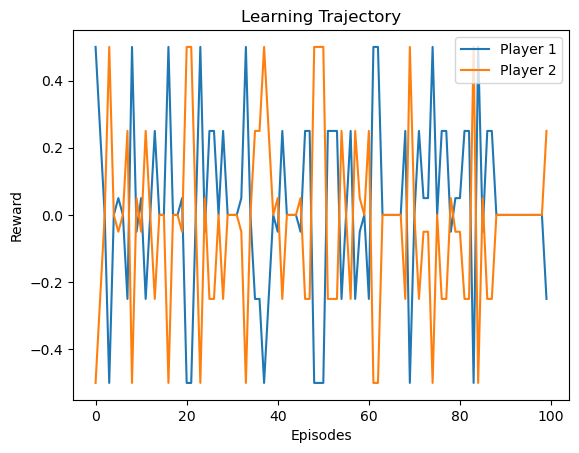

In [15]:
training_episodes = 100
rewards = train(env, agents, training_episodes)

plot_learning_trajectory(rewards, training_episodes)

Dispersion Game

training completed after 100 episodes


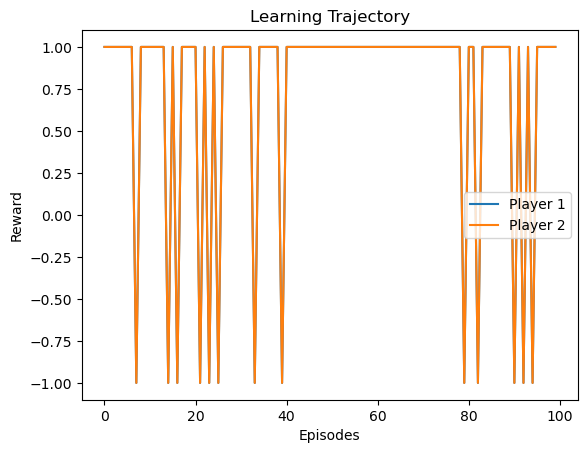

training completed after 100 episodes


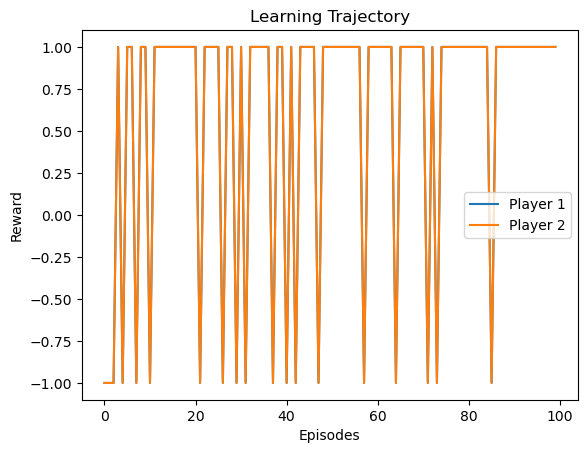

In [16]:
env = rl_environment.Environment(dispersion_game)
num_actions = env.action_spec()["num_actions"]
agents = [
    tabular_qlearner.QLearner(player_id=idx, num_actions=num_actions)
    for idx in range(num_players)
]
training_episodes = 100
rewards = train(env, agents, training_episodes)

plot_learning_trajectory(rewards, training_episodes)

agents = [
    boltzmann_tabular_qlearner.BoltzmannQLearner(player_id=idx, num_actions=num_actions)
    for idx in range(num_players)
]

rewards = train(env, agents, training_episodes)

plot_learning_trajectory(rewards, training_episodes)

Battle of the sexes

training completed after 100 episodes


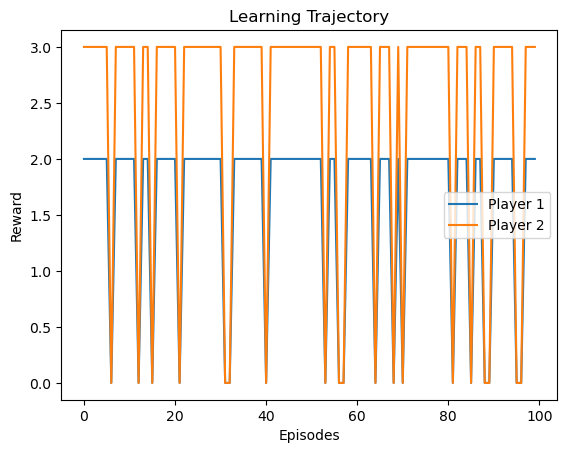

training completed after 100 episodes


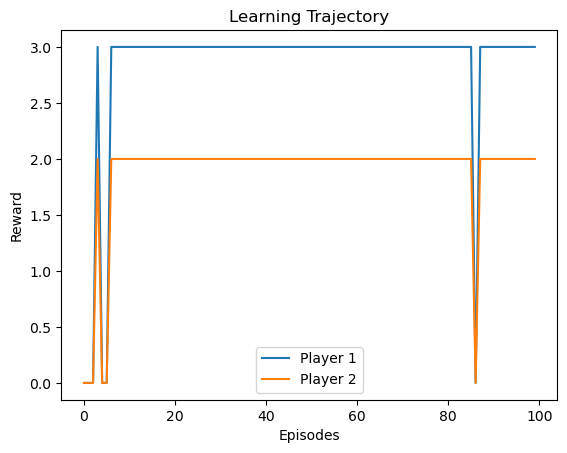

In [17]:
env = rl_environment.Environment(battle_of_the_sexes)
num_actions = env.action_spec()["num_actions"]
agents = [
    tabular_qlearner.QLearner(player_id=idx, num_actions=num_actions)
    for idx in range(num_players)
]
training_episodes = 100
rewards = train(env, agents, training_episodes)

plot_learning_trajectory(rewards, training_episodes)

agents = [
    boltzmann_tabular_qlearner.BoltzmannQLearner(player_id=idx, num_actions=num_actions)
    for idx in range(num_players)
]

rewards = train(env, agents, training_episodes)

plot_learning_trajectory(rewards, training_episodes)

Prisoners dillema Boltzman

training completed after 100 episodes


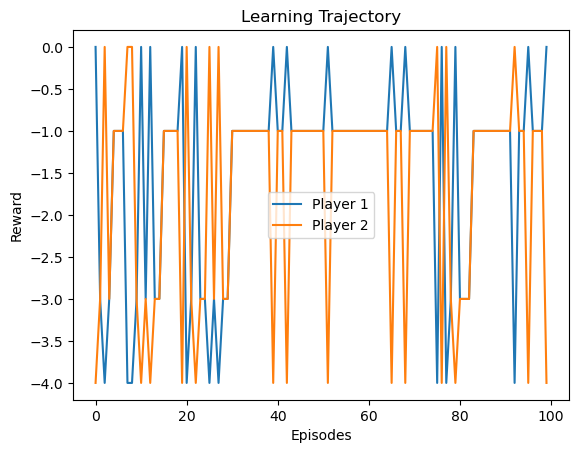

training completed after 100 episodes


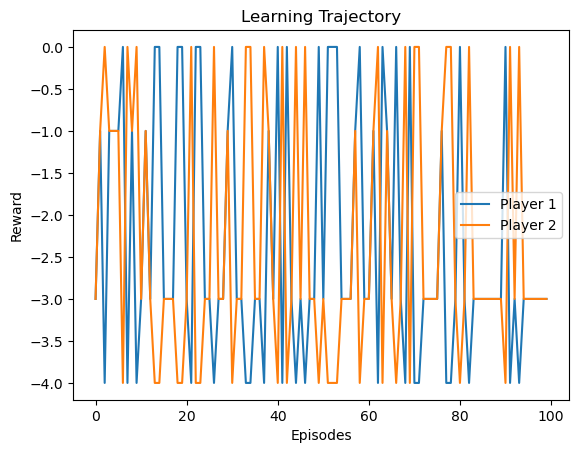

In [18]:
env = rl_environment.Environment(prisoners_dilemma)
num_actions = env.action_spec()["num_actions"]
agents = [
    tabular_qlearner.QLearner(player_id=idx, num_actions=num_actions)
    for idx in range(num_players)
]
training_episodes = 100
rewards = train(env, agents, training_episodes)

plot_learning_trajectory(rewards, training_episodes)

agents = [
    boltzmann_tabular_qlearner.BoltzmannQLearner(player_id=idx, num_actions=num_actions)
    for idx in range(num_players)
]

rewards = train(env, agents, training_episodes)

plot_learning_trajectory(rewards, training_episodes)

### Dynamics of learning in benchmark matrix games

In [19]:
# Creates labels for games
plot_labels = { "dispersion_game": ["Player 1: prob of choosing A", "Player 2: prob of choosing A"],
                "prisoners_dilemma": ["Player 1: prob of choosing Defect", "Player 2: prob of choosing Defect"],
                "battle_of_the_sexes": ["Player 1: prob of choosing Ballet", "Player 2: prob of choosing Ballet"],
                "biased_rock_paper_scissors": ["Rock", "Paper", "Scissors"],
                "matching_pennies_new": ["Player 1: prob of choosing Heads", "Player 2: prob of choosing Heads"] }

In [20]:
from open_spiel.python.egt.dynamics import MultiPopulationDynamics

class LenientMultiPopulationDynamics(object):

    def __init__(self, payoff_tensor, dynamics, k=1):
        """Initializes the multi-population dynamics."""
        if isinstance(dynamics, list) or isinstance(dynamics, tuple):
            assert payoff_tensor.shape[0] == len(dynamics)
        else:
            dynamics = [dynamics] * payoff_tensor.shape[0]
        self.payoff_tensor = payoff_tensor
        self.dynamics = dynamics
        self.k = k

    def __call__(self, state, time=None):
        state = np.array(state)
        n = self.payoff_tensor.shape[0]     # number of players
        ks = self.payoff_tensor.shape[1:]   # number of strategies for each player
        assert state.shape[0] == sum(ks)

        states = np.split(state, np.cumsum(ks)[:-1])
        dstates = [None] * n
        for i in range(n):
            # move i-th population to front
            fitness = self.new_fitness(i, ks, states)
            dstates[i] = self.dynamics[i](states[i], fitness)

        return np.concatenate(dstates)

    def new_fitness(self, p, ks, states):
        payoff = np.moveaxis(self.payoff_tensor[p], p, 0)
        fitness = np.zeros(shape=ks[p])
        # for each action
        for i in range(ks[p]):
            # for all other players
            p_ = abs(1 - p)  # FOR 2 PLAYERS ONLY
            u_i = 0
            # for each action each other player can take:
            for j in range(ks[p_]):
                strictworse_actions = 0     # k:Aik<Aij
                worse_actions = 0           # k:Aik≤Aij
                equal_actions = 0           # k:Aik==Aij
                #iterate over all actions the other player could have taken
                for k in range(ks[p_]):
                    if payoff[i][k] < payoff[i][j]:
                        strictworse_actions += (states[p_][k])
                        worse_actions += (states[p_][k])
                    elif payoff[i][k] == payoff[i][j]:
                        worse_actions += (states[p_][k])
                        equal_actions += (states[p_][k])
                ## u_i = sum_j (PayoffMatrix(P1)[j]        * ActionProb(P2)[j] * [sum_k:Aik≤Aij(ActionProb(P2)[k])**k - sum_k:Aik<Aij(ActionProb(P2)[k])**k] / sum_k:Aik=Aij(ActionProb(P2)[k])
                u_i += payoff[i][j] * states[p_][j] * ( worse_actions**self.k - strictworse_actions**self.k) / equal_actions
            fitness[i] = u_i
        return fitness


In [66]:
from open_spiel.python.egt.utils import game_payoffs_array
from open_spiel.python.egt.dynamics import replicator, MultiPopulationDynamics
%matplotlib qt

# Holds games 2x2
games = [dispersion_game, battle_of_the_sexes, prisoners_dilemma]
# games = [dispersion_game, battle_of_the_sexes, prisoners_dilemma, matching_pennies_new]

# Creating Dynamic Plots
def dynamic_plots(games, dynamics =  None, k_lenient = None):
    if dynamics is None:
        dynamics = replicator

    plt.figure(figsize=(12, 8))
    num_points = 10
    prob = np.linspace(0., 1., num_points + 2)[1:-1]
    x, y = np.meshgrid(prob, prob)

    for g, game in enumerate(games):
        payoff_tensor = game_payoffs_array(game)
        if k_lenient is None:
            dyn = MultiPopulationDynamics(payoff_tensor, dynamics)
        else:
            dyn = LenientMultiPopulationDynamics(payoff_tensor, dynamics, k_lenient )

        u = np.empty(x.shape)
        v = np.empty(x.shape)

        # Plotting dyn in each axis
        ax = plt.subplot2grid((2, len(games)), (0, g))
        for i in range(num_points):
            for j in range(num_points):
                row_state = np.array([x[i, j], 1. - x[i, j]])
                col_state = np.array([y[i, j], 1. - y[i, j]])
                state = np.concatenate((row_state, col_state))
                dstate = dyn(state)
                u[i][j] = dstate[0]
                v[i][j] = dstate[2]
        ax.quiver(x, y, u, v)
        plt.title(game.get_type().long_name.title())
        plt.xlabel(plot_labels[game.get_type().short_name][0])
        plt.ylabel(plot_labels[game.get_type().short_name][1])
        plt.xlim(-0.01, 1.01)
        plt.ylim(-0.01, 1.01)
        plt.tight_layout(pad=1.12)

        # Plotting dyn in each axis
        linewidth="velocity"
        color="velocity"
        if linewidth == "velocity" or color == "velocity":
            vel = np.sqrt(u**2 + v**2)
            vel = vel - np.min(vel)
            vel = vel / np.max(vel)

            if linewidth == "velocity":
                linewidth = 3. * vel

            if color == "velocity":
                color = vel

        ax = plt.subplot2grid((2, len(games)), (1, g))
        ax.streamplot(x, y, u, v, minlength=0.1, linewidth=linewidth, color=color)
        plt.title(game.get_type().long_name.title())
        plt.xlabel(plot_labels[game.get_type().short_name][0])
        plt.ylabel(plot_labels[game.get_type().short_name][1])
        plt.xlim(-0.01, 1.01)
        plt.ylim(-0.01, 1.01)
        plt.tight_layout(pad=1.12)
        plt.savefig("images/all_Quiver_Stream_plots.png")

    plt.show()

#### Plotting Vector Fields and Stream Plots of 2x2 Games - Replicator

In [22]:
dynamic_plots(games)

In [23]:
# For Saving Overleaf graphs
def save_QuiverStream_Plots(games):
    num_points = 10
    prob = np.linspace(0., 1., num_points + 2)[1:-1]
    x, y = np.meshgrid(prob, prob)

    for game in games:
        payoff_tensor = game_payoffs_array(game)
        dyn = MultiPopulationDynamics(payoff_tensor, replicator)
        u = np.empty(x.shape)
        v = np.empty(x.shape)

        # Plotting dyn in each axis
        fig = plt.figure(figsize=(4, 4))
        ax = fig.add_subplot(111)
        for i in range(num_points):
            for j in range(num_points):
                row_state = np.array([x[i, j], 1. - x[i, j]])
                col_state = np.array([y[i, j], 1. - y[i, j]])
                state = np.concatenate((row_state, col_state))
                dstate = dyn(state)
                u[i][j] = dstate[0]
                v[i][j] = dstate[2]
        ax.quiver(x, y, u, v)
        plt.title(game.get_type().long_name.title())
        plt.xlabel(plot_labels[game.get_type().short_name][0])
        plt.ylabel(plot_labels[game.get_type().short_name][1])
        plt.xlim(-0.01, 1.01)
        plt.ylim(-0.01, 1.01)
        plt.tight_layout(pad=1.12)
        plt.savefig("images/directional_field_" + game.get_type().short_name + ".png")

        # Plotting dyn in each axis
        linewidth="velocity"
        color="velocity"
        if linewidth == "velocity" or color == "velocity":
            vel = np.sqrt(u**2 + v**2)
            vel = vel - np.min(vel)
            vel = vel / np.max(vel)

            if linewidth == "velocity":
                linewidth = 3. * vel

            if color == "velocity":
                color = vel

        fig = plt.figure(figsize=(4, 4))
        ax = fig.add_subplot(111)
        ax.streamplot(x, y, u, v, minlength=0.1, linewidth=linewidth, color=color)
        plt.title(game.get_type().long_name.title())
        plt.xlabel(plot_labels[game.get_type().short_name][0])
        plt.ylabel(plot_labels[game.get_type().short_name][1])
        plt.xlim(-0.01, 1.01)
        plt.ylim(-0.01, 1.01)
        plt.tight_layout(pad=1.12)
        plt.savefig("images/streamline_" + game.get_type().short_name + ".png")

# save_QuiverStream_Plots(games)

 #### Lenient Boltzmann Q-learning dynamics

In [24]:
from open_spiel.python import rl_agent
from open_spiel.python.algorithms.tabular_qlearner import QLearner
class LenientBoltzman_qlearner(QLearner):
    """Lenient Boltzman Q-Learner for Matrix game.

    For more details, see equation (6) & (7) in
    http://michaelkaisers.com/publications/2010_BNAIC_Bloembergen_LFAQ.pdf
    """
    def __init__(self,
                 player_id,
                 num_actions,
                 temperature=1.0,
                 k=10,
                 discount_factor=1.0):

        super().__init__(player_id, num_actions, discount_factor)
        self._temperature = temperature
        self._prev_rewards = dict()
        self._k = k
        self._k_probs = []
        self._k_actions = []
        self._k_rewards = []
        self._beta = 0.5

        for i in range(num_actions):
            self._prev_rewards[i] = np.array([])

    def _get_action_probs(self, info_state, legal_actions, temperature):
        """Action selection based on boltzmann probability interpretation of Q-values.

        For more details, see equation (2) page 2 in
        https://arxiv.org/pdf/1109.1528.pdf
        """
        probs = np.zeros(self._num_actions)

        if temperature > 0.0:
            probs += [
                np.exp((1 / temperature) * self._q_values[info_state][i])
                for i in range(self._num_actions)
            ]
            probs /= np.sum(probs)
        else:
            # Temperature = 0 causes normal greedy action selection
            greedy_q = max([self._q_values[info_state][a] for a in legal_actions])
            greedy_actions = [
                a for a in legal_actions if self._q_values[info_state][a] == greedy_q
            ]

            probs[greedy_actions] += 1 / len(greedy_actions)

        action = np.random.choice(range(self._num_actions), p=probs)
        return action, probs

    def step(self, time_step, is_evaluation=False):
        """Returns the action to be taken and updates the Q-values if needed.
        """
        if self._centralized:
            info_state = str(time_step.observations["info_state"])
        else:
            info_state = str(time_step.observations["info_state"][self._player_id])
        legal_actions = time_step.observations["legal_actions"][self._player_id]

        # Prevent undefined errors if this agent never plays until terminal step
        # action, probs = None, None

        # Act step: don't act at terminal states.
        # if not time_step.last():
        action, probs = self._get_action_probs(info_state, legal_actions, temperature=self._temperature)

        # Learn step: don't learn during evaluation or at first agent steps.
        if self._prev_info_state and not is_evaluation:

            self._k_rewards.append(time_step.rewards[self._player_id])
            self._k_actions.append(self._prev_action)
            self._k_probs.append(probs)

            if len(self._k_actions) == self._k:
                max_rew = np.amax(self._k_rewards)
                best_index = np.where(self._k_rewards == max_rew)[0][0]
                self._prev_action = self._k_actions[best_index]
                self._prev_probs = self._k_probs[best_index]
                target = self._k_rewards[best_index]

                if not time_step.last():  # Q values are zero for terminal.
                    # gamma*max_j Q_j(t) - Q_i(t)
                    target += self._discount_factor * max(
                        [self._q_values[info_state][a] for a in legal_actions])

                prev_q_value = self._q_values[self._prev_info_state][self._prev_action]

                self._last_loss_value = target - prev_q_value

                # FAQ: Q_i(t+1) = Q_i(t) + min(B/x_i, 1) * alpha * [ r(t+1) + gamma*max_j Q_j(t) - Q_i(t) ]
                self._q_values[self._prev_info_state][self._prev_action] += min(self._beta / self._prev_probs[self._prev_action], 1) * self._step_size * self._last_loss_value

                # Reset for new cycle
                self._k_actions = []
                self._k_rewards = []
                self._k_probs = []

            if time_step.last():  # prepare for the next episode.
                self._prev_info_state = None
                return

        # Don't mess up with the state during evaluation.
        if not is_evaluation:
            self._prev_info_state = info_state
            self._prev_action = action
            self._prev_probs = probs
        return rl_agent.StepOutput(action=action, probs=probs)


#### Ploting Lenient Boltzman Q-Learning

In [25]:
env = rl_environment.Environment(prisoners_dilemma)
num_actions = env.action_spec()["num_actions"]
agents = [
    LenientBoltzman_qlearner(player_id=idx, num_actions=num_actions, temperature=0.3, k=25)
    for idx in range(num_players)
]
training_episodes = 10
rewards = train(env, agents, training_episodes)

plot_learning_trajectory(rewards, training_episodes)

training completed after 10 episodes


In [26]:
env = rl_environment.Environment(prisoners_dilemma)
num_actions = env.action_spec()["num_actions"]
agents = [
    tabular_qlearner.QLearner(player_id=idx, num_actions=num_actions)
    for idx in range(num_players)
]
training_episodes = 10
rewards = train(env, agents, training_episodes)

plot_learning_trajectory(rewards, training_episodes)

training completed after 10 episodes


#### Plotting Vector Fields and Stream Plots of 2x2 Games - Lenient Boltzman

In [27]:
# Defines new Dynamics plots
def boltzmannq(state, fitness, temperature=1.):
    """" Already Defined"""
    exploitation = (1. / temperature) * replicator(state, fitness)
    exploration = (np.log(state) - state.dot(np.log(state).transpose()))
    return exploitation - state * exploration

def boltzmann_faqlearning(state, fitness, temperature=0.01):
    """ For more details, see equation (9) in
    http://michaelkaisers.com/publications/2010_BNAIC_Bloembergen_LFAQ.pdf
    """
    exploitation = (1. / temperature) * replicator(state, fitness)
    exploration = state.dot(np.log(state).transpose()) - np.log(state)*np.sum(state)
    return exploitation - state * exploration

In [86]:
# Creating Dynamic Plots for Lenient Boltzmann
def dynamic_k_plots(games, dynamics, k_lenient_array):

    plt.figure(figsize=(13, 12))
    num_points = 10
    prob = np.linspace(0., 1., num_points + 2)[1:-1]
    x, y = np.meshgrid(prob, prob)

    for g, game in enumerate(games):
        payoff_tensor = game_payoffs_array(game)

        for k, k_value in enumerate(k_lenient_array):
            dyn = LenientMultiPopulationDynamics(payoff_tensor, dynamics, k_value)

            u = np.empty(x.shape)
            v = np.empty(x.shape)

            # Plotting dyn in each axis
            ax = plt.subplot2grid((len(games), len(k_lenient_array)), (g, k))

            for i in range(num_points):
                for j in range(num_points):
                    row_state = np.array([x[i, j], 1. - x[i, j]])
                    col_state = np.array([y[i, j], 1. - y[i, j]])
                    state = np.concatenate((row_state, col_state))
                    dstate = dyn(state)
                    u[i][j] = dstate[0]
                    v[i][j] = dstate[2]
            ax.quiver(x, y, u, v)

            # Plotting Title of Game in Center
            if k == len(k_lenient_array)//2:
                plt.title(game.get_type().long_name.title(), fontdict={'fontsize': 14}, fontweight='bold', x=0.5, y=1.1)

            # Plotting K value in bottom of plot
            if g == len(games)-1:
                plt.text(0.5, -0.5, "k = " + str(k_value), fontsize=14, horizontalalignment='center',
                         fontweight='bold')

            plt.xlabel('P1')
            plt.ylabel('P2')
            plt.xlim(-0.01, 1.01)
            plt.ylim(-0.01, 1.01)
            plt.tight_layout(pad=1.12)
            plt.savefig("images/dynamic_k_plots.png")

    plt.show()

In [87]:
# Value k for Lenient Boltzmann
k = [1, 5, 10, 15, 20] # array needs to have odd lenght for center titles
dynamic_k_plots(games, boltzmann_faqlearning, k)